# Importar librerías

In [1]:
from fastai.vision.all import *
from pathlib import Path
from PIL import Image
import os
import time

# Creación del modelo

In [2]:
PATH = Path('/home/javier/Escritorio/archive/mask_detector')

In [3]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=69),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
#data = data.new(item_tfms=Resize(64, ResizeMethod.Squish))
#data = data.new(item_tfms=RandomResizedCrop(64, min_scale=0.9))
data = data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))

In [10]:
dls = data.dataloaders(PATH/'images')

In [15]:
dls

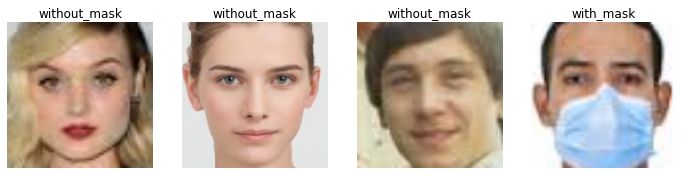

In [550]:
dls.valid.show_batch(max_n=4, nrows=1)

In [551]:
learn = cnn_learner(dls, squeezenet1_1, metrics=[accuracy, error_rate])

In [552]:
learn.freeze
learn.fine_tune(3)
learn.unfreeze

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.028958,0.492810,0.905405,0.094595,00:00


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.331511,0.232508,0.945946,0.054054,00:01
1,0.246998,0.180824,0.945946,0.054054,00:01
2,0.189765,0.193497,0.949324,0.050676,00:01


<bound method Learner.unfreeze of <fastai.learner.Learner object at 0x7f132cba8f70>>

In [553]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.091779,0.153712,0.952703,0.047297,00:00


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.058233,0.178142,0.949324,0.050676,00:01
1,0.057408,0.164784,0.942568,0.057432,00:01
2,0.046898,0.178949,0.942568,0.057432,00:01
3,0.039579,0.133225,0.959459,0.040541,00:01
4,0.038084,0.135712,0.966216,0.033784,00:01


In [554]:
start_time = time.time()
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
learn.predict(Path('/home/javier/Escritorio/archive/images/maksssksksss0.png'))
print("--- %s seconds ---" % ((time.time() - start_time)/10))

--- 0.023024725914001464 seconds ---


In [555]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 63 x 63    1,792      True      
________________________________________________________________
ReLU                 64 x 64 x 63 x 63    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 31 x 31    0          False     
________________________________________________________________
Conv2d               64 x 16 x 31 x 31    1,040      True      
________________________________________________________________
ReLU                 64 x 16 x 31 x 31    0          False     
________________________________________________________________
Conv2d               64 x 64 x 31 x 31    1,088      True      
________________________________________________________________
ReLU                 64 x 64 x 31 x 31    0          False     
_________________________________________________

# Resultados del modelo

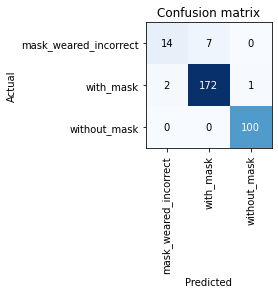

In [556]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

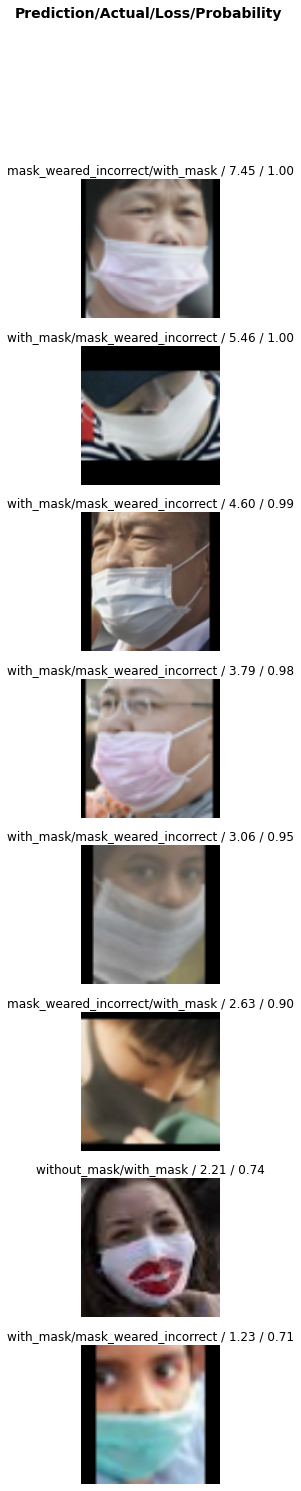

In [557]:
interp.plot_top_losses(8, nrows=8)

# Guardar y probar modelo

In [558]:
learn.export(PATH/'mask_detector.pkl')

In [14]:
learn = load_learner(PATH/'mask_detector.pkl')

In [73]:
prediction

('without_mask', tensor(2), tensor([0.0096, 0.1351, 0.8552]))